### TASK - 3 : IRIS Flower Classification

In [2]:
#Import Libraries for data processing and modelling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
# Dataset First Look
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
#Checking the null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
type(df['species'].value_counts())

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x20688df5ad0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Iris-setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Iris-versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'Iris-virginica')])

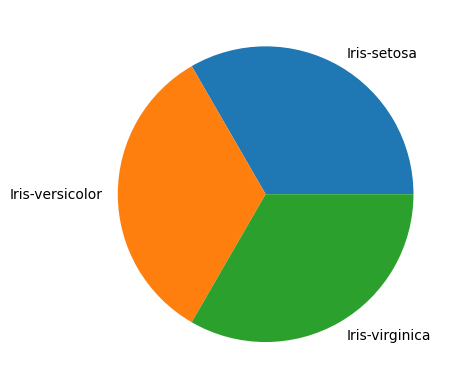

In [16]:
plt.pie(x = df['species'].value_counts(),labels = df['species'].value_counts().index)

In [8]:
#importing libraries used for encoding

from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [9]:
# transform into integer datatype

for i in df.columns:
    if is_numeric_dtype(df[i]):
        continue
    else:
        df[i] = le.fit_transform(df[i])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# split the data

Y = df.species
X = df.drop(['species'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [13]:
# Importing LogisticRegression for model building

from sklearn.linear_model import LogisticRegression

In [14]:
# Building machine learning model and training them

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
#Evaluating the model to verify the accuracy

print("Score for Train data",model.score(X_train, y_train))
print("Score for Test data",model.score(X_test, y_test))

Score for Train data 0.9809523809523809
Score for Test data 0.9555555555555556


In [16]:
# Importing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Building machine learning model and training them

rf = RandomForestClassifier(n_estimators = 300 , random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [17]:
#Evaluating the model to verify the accuracy

print("Score for Train data", rf.score(X_train, y_train))
print("Score for Test data", rf.score(X_test, y_test))

Score for Train data 1.0
Score for Test data 0.9555555555555556


In [18]:
# knn k-nearest neigbours
from sklearn.neighbors import KNeighborsClassifier

# Building machine learning model and training them

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
#Evaluating the model to verify the accuracy

print("Score for Train data", knn.score(X_train, y_train))
print("Score for Test data", knn.score(X_test, y_test))

Score for Train data 0.9714285714285714
Score for Test data 0.9777777777777777


In [20]:
# For testing, We create a new dataframe with values close to the any of our existing data to evaluate.

data = {'sepal_length': [4.1], 'sepal_width': [3.4], 'petal_length': [2.1], 'petal_width': [0.4]}
test_data = pd.DataFrame(data)

In [21]:
result1 = model.predict(test_data)
result2 = rf.predict(test_data)
result3 = knn.predict(test_data)

# Display the predicted result from the Model
print("Result Species (using LogisticRegression):", result1[0])
print("Result Species (using RandomForestClassifier):", result2[0])
print("Result Species (using KNeighborsClassifier):", result3[0])

Result Species (using LogisticRegression): 0
Result Species (using RandomForestClassifier): 0
Result Species (using KNeighborsClassifier): 0
